# The safety of the Chicago streets

## Introduction
Crime is an escalating problem for the city of Chicago. The amount of violent crime incidents has surged by 11% and the amount of arrests has dropped compared to the previous year (Illinois Policy, 2024). This alarming trend has resulted in the highest amount of crime since the start of the new decade. Understanding the impact of crime extends beyond just recognizing its immediate effects on victims. It also affects various aspects of urban life to a certain extent. We want to know how far that certain extent goes and to make that analysis we thought of 2 perspectives.
	Perspective 1: Chicago is known for the extreme amount of crime that occurs there, which directly correlates to the amount of traffic accidents that happen there. Therefore the amount of crimes need to be reduced so that the citizens of Chicago can live peaceful lives.
	Perspective 2: The amount of Crime that occurs in Chicago is extreme but it has no direct correlation to the amount of traffic accidents that happen there. It is therefore not necessary to address the amount of crime immediately since no citizens are in harm's way.

We will analyze data from the Chicago Police Department's CLEAR database which contains the crime data and the same police department also released their data of traffic accidents.
With this project we want to shed some light on the factors at play and create a realistic picture of what is happening.




In [143]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

#import data
crime_data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

crash_data = pd.read_csv('Traffic_Crashes_Crashes.csv')

beat_data = pd.read_csv('master.csv')

police_data = pd.read_csv('police-stations.csv')

crime_data.head()

Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0            29.0       08B   
1            RESIDENCE   False  ...  20.0            42.0       08B   
2               STREET   False  ...  37.0            25.0        24   
3             SIDEWALK   False  ...  28.0            25.0       08B   
4            RESIDENCE   False  ...  28.0            25.0        06   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073   
1     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922   
2     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908   
3     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687   
4     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297   

   Longitude                       Location  
0 -87.706819  (41.864073157, -87.706818608)  
1 -87.604363   (41.782921527, -87.60436317)  
2 -87.758372  (41.894908283, -87.758371958)  
3 -87.749516  (41.885686845, -87.749515983)  
4 -87.761751  (41.886297242, -87.761750709)  

[5 rows x 23 columns]

In [22]:
def get_variable_types(crime_data):
    # Get the data types of all variables
    variable_types = crime_data.dtypes

    return variable_types

get_variable_types(crime_data)

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [23]:
def calculate_mean_coordinates(crash_data):
    # Calculate the mean longitude and latitude
    mean_longitude = crash_data['LONGITUDE'].mean()
    mean_latitude = crash_data['LATITUDE'].mean()

    return {
        'mean_longitude': mean_longitude,
        'mean_latitude': mean_latitude
    }

calculate_mean_coordinates(crash_data)

{'mean_longitude': -87.67344979708153, 'mean_latitude': 41.854788306572964}

In [24]:
def show_head_hit_and_run(crash_data, n=5):
    # Return the first n rows of the 'HIT_AND_RUN_I' column
    return crash_data['HIT_AND_RUN_I'].head(n)

show_head_hit_and_run(crash_data)

0    NaN
1    NaN
2      Y
3    NaN
4    NaN
Name: HIT_AND_RUN_I, dtype: object

In [25]:
def analyze_hit_and_run(crash_data):
    # Count the number of True and False values
    count_true = crash_data[crash_data['HIT_AND_RUN_I'] == 'Y'].shape[0]

    # Calculate the percentages
    total_count = crash_data.shape[0]
    percent_true = (count_true / total_count) * 100

    return {
        'count_true': count_true,
        'percent_true': percent_true
    }

analyze_hit_and_run(crash_data)

{'count_true': 237948, 'percent_true': 29.932222663895864}

In [26]:
def count_daylight(crash_data):
    # Count the number of 'DAYLIGHT' instances
    count_daylight = crash_data[crash_data['LIGHTING_CONDITION'] == 'DAYLIGHT'].shape[0]

    # Calculate the percentage
    total_count = crash_data.shape[0]
    percent_daylight = (count_daylight / total_count) * 100

    return {
        'count_daylight': count_daylight,
        'percent_daylight': percent_daylight
    }

count_daylight(crash_data)

{'count_daylight': 509963, 'percent_daylight': 64.14983973955792}

In [31]:
# Extract hour from 'CRASH_DATE'
crash_data.dropna(subset=['CRASH_DATE'], inplace=True)
crash_data['HOUR'] = crash_data['CRASH_DATE'].dt.hour
crash_data['MONTH'] = crash_data['CRASH_DATE'].dt.month

# Count the number of crashes per hour
crash_counts_per_hour = crash_data['HOUR'].value_counts().sort_index()
crash_counts_per_month = crash_data['MONTH'].value_counts().sort_index()


# Create a bar plot for crashes by hour
fig_hour = px.bar(x=crash_counts_per_hour.index, y=crash_counts_per_hour.values, labels={'x': 'Hour of the Day', 'y': 'Number of Crashes'}, title='Number of Crashes by Hour of the Day')

fig_hour.show()
fig_month = px.bar(x=crash_counts_per_month.index, y=crash_counts_per_month.values, 
                   labels={'x': 'Month', 'y': 'Number of Crashes'}, 
                   title='Number of Crashes by Month')

fig_month.show()

AttributeError: Can only use .dt accessor with datetimelike values

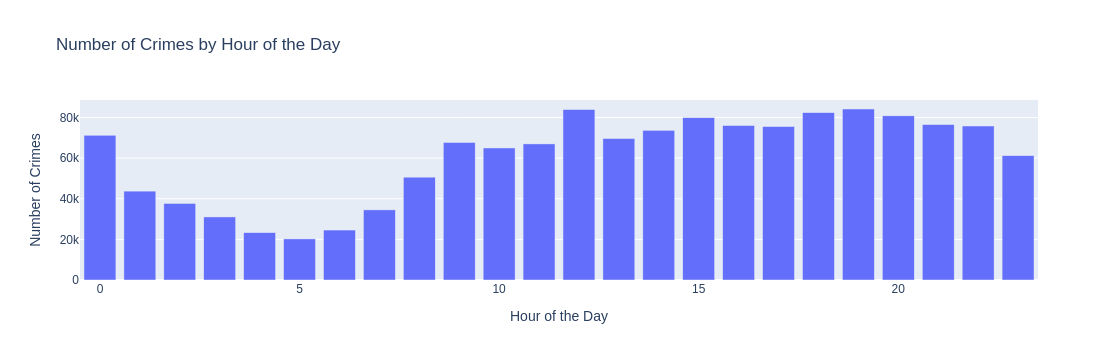

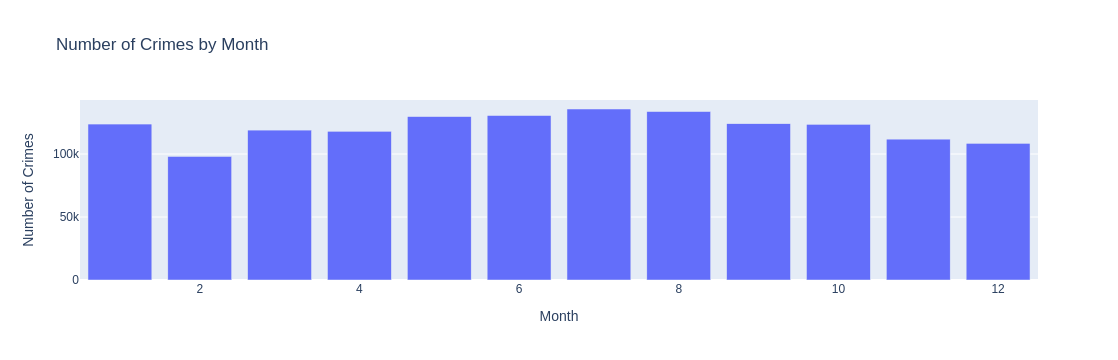

In [28]:
# Assuming crime_data is already loaded and contains a 'Date' column with dates in the format "mm/dd/yyyy hh:mm:ss AM/PM"

# Convert 'Date' to datetime with explicit format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour from 'Date'
crime_data['HOUR'] = crime_data['Date'].dt.hour

# Count the number of crimes per hour
crime_counts_per_hour = crime_data['HOUR'].value_counts().sort_index()

# Create a bar plot for crimes by hour
fig_crime_hour = px.bar(x=crime_counts_per_hour.index, y=crime_counts_per_hour.values, labels={'x': 'Hour of the Day', 'y': 'Number of Crimes'}, title='Number of Crimes by Hour of the Day')

fig_crime_hour.show()

crime_data['MONTH'] = crime_data['Date'].dt.month

# Count the number of crimes per month
crime_counts_per_month = crime_data['MONTH'].value_counts().sort_index()

# Create a bar plot for crimes by month
fig_crime_month = px.bar(x=crime_counts_per_month.index, y=crime_counts_per_month.values, 
                         labels={'x': 'Month', 'y': 'Number of Crimes'}, 
                         title='Number of Crimes by Month')

fig_crime_month.show()

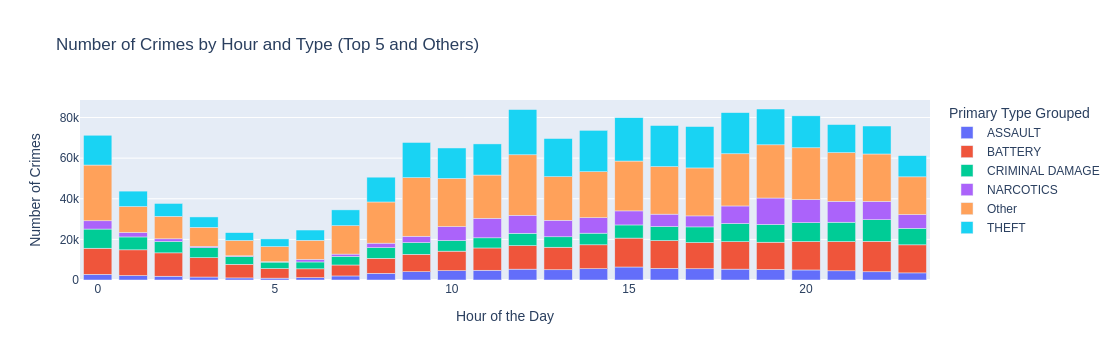

In [29]:
# Load data
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour from 'Date'
crime_data['HOUR'] = crime_data['Date'].dt.hour

# Get the top 5 crime types
top_5_crime_types = crime_data['Primary Type'].value_counts().head(5).index

# Assign 'Other' to crime types not in the top 5
crime_data['Primary Type Grouped'] = crime_data['Primary Type'].where(crime_data['Primary Type'].isin(top_5_crime_types), 'Other')

# Count the number of crimes per hour and type
crime_counts_per_hour_grouped = crime_data.groupby(['HOUR', 'Primary Type Grouped']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(crime_counts_per_hour_grouped, x='HOUR', y='count', color='Primary Type Grouped',
             labels={'HOUR': 'Hour of the Day', 'count': 'Number of Crimes'},
             title='Number of Crimes by Hour and Type (Top 5 and Others)')

fig.show()

In [30]:
# Filter crime_data for rows where 'Primary Type' is 'THEFT'
theft_data = crime_data[crime_data['Primary Type'] == 'THEFT']

# Count the number of thefts per hour
theft_counts_per_hour = theft_data['HOUR'].value_counts().sort_index()

# Assuming crash_counts_per_hour is already calculated

# Create traces for the plot
trace_crashes = go.Bar(x=crash_counts_per_hour.index, y=crash_counts_per_hour.values, name='Crashes', marker_color='blue')
trace_thefts = go.Bar(x=theft_counts_per_hour.index, y=theft_counts_per_hour.values, name='Thefts', marker_color='red')

# Create a figure and add traces
fig = go.Figure(data=[trace_crashes, trace_thefts])

# Update layout for a clear visualization
fig.update_layout(barmode='group', title='Number of Crashes and Thefts by Hour of the Day', xaxis_title='Hour of the Day', yaxis_title='Number of Incidents')

fig.show()


NameError: name 'crash_counts_per_hour' is not defined

In [116]:
total_thefts = theft_counts_per_hour.sum()
total_crashes = crash_counts_per_hour.sum()

# Calculate the percentage of thefts and crashes per hour
theft_percentage_per_hour = (theft_counts_per_hour / total_thefts) * 100
crash_percentage_per_hour = (crash_counts_per_hour / total_crashes) * 100

aligned_crashes = theft_percentage_per_hour
aligned_thefts = crash_percentage_per_hour

# Create traces for the plot
trace_crashes_percentage = go.Bar(x=crash_percentage_per_hour.index, y=crash_percentage_per_hour.values, name='Crashes Percentage', marker_color='blue')
trace_thefts_percentage = go.Bar(x=theft_percentage_per_hour.index, y=theft_percentage_per_hour.values, name='Thefts Percentage', marker_color='red')

correlation_data = pd.DataFrame({
    'Crashes': aligned_crashes,
    'Thefts': aligned_thefts
})

# Calculate the Pearson correlation coefficient
correlation = correlation_data.corr().loc['Crashes', 'Thefts']
# Create a figure and add traces
fig_percentage = go.Figure(data=[trace_crashes_percentage, trace_thefts_percentage])

# Update layout for a clear visualization
fig_percentage.update_layout(barmode='group', title='Percentage of Daily Total Crashes and Thefts by Hour of the Day', xaxis_title='Hour of the Day', yaxis_title='Percentage of Daily Total')

fig_percentage.add_annotation(
    x=0.5, 
    y=1.1, 
    xref='paper', 
    yref='paper', 
    text=f'Pearson correlation coefficient: {correlation:.2f}', 
    showarrow=False, 
    font=dict(size=14)
)

fig_percentage.show()

NameError: name 'crash_counts_per_hour' is not defined

In [ ]:
##################################################################################

## Location
For the police to stop people from commiting crime, it is usefull to know where the crime is concentrated in a certain area. To make it easier to locate crime, cities should be cut into smaller subdivisions where specific police officers operate. Fot the city of Chicago, a division of 25 police districts is made. Furthermore, these districts are subsumed by beats, which are the specific area's where one officer operates. By the use of divisions, it is easier to relocate the high-crime neighbourhoods, where more police surveillance/ assistance is needed. The following map shows the city of chicago divided into it's districts. The red spots in the map denote (reported) traffic incidents with injury and the blue dots denote (reported) crime. Police stations are considered as well and are represented by the green transparent wheels in the image. 




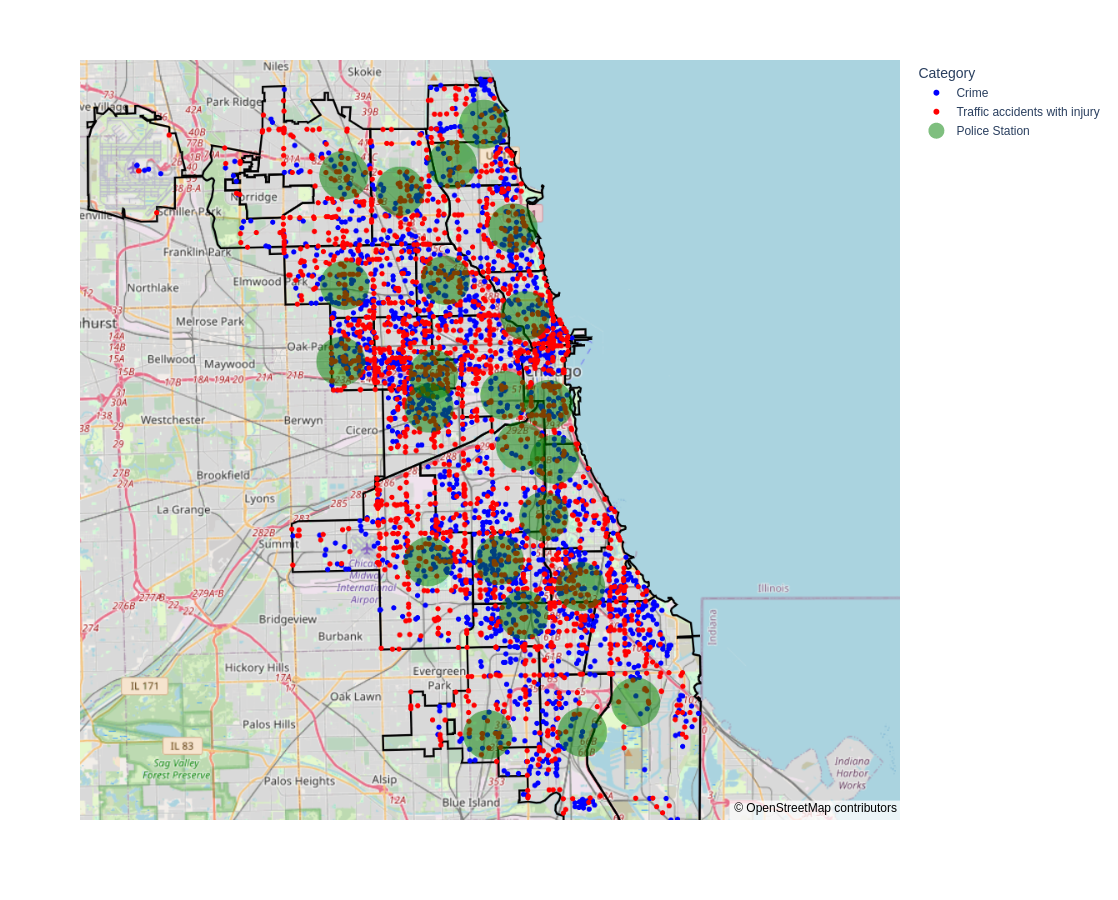

In [138]:
import requests
crime_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)
crash_data.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
crash_data = crash_data[crash_data['CRASH_TYPE'].str.contains('INJURY AND / OR TOW DUE TO CRASH', na=False)]

crime_data_sample = crime_data.sample(n=2000, random_state=1)
crash_data_sample = crash_data.sample(n=2000, random_state=1)

combined_data = pd.DataFrame({
    'Latitude': pd.concat([crime_data_sample['Latitude'], crash_data_sample['LATITUDE']]),
    'Longitude': pd.concat([crime_data_sample['Longitude'], crash_data_sample['LONGITUDE']]),
    'Category': ['Crime'] * len(crime_data_sample) + ['Traffic accidents with injury'] * len(crash_data_sample)
})


police_stations = police_data[['LATITUDE', 'LONGITUDE']].copy()
police_stations['Category'] = 'Police Station'
police_stations['Size'] = 40 

# Define color scale
color_scale = {
    'Crime': 'blue',
    'Traffic accidents with injury': 'red',
    'Police Station': 'green'
}
geojson_url = 'https://data.cityofchicago.org/api/geospatial/fthy-xz3r?method=export&format=GeoJSON'
# geojson_url = 'https://raw.githubusercontent.com/blackmad/neighborhoods/master/chicago.geojson'
response = requests.get(geojson_url)
geojson_data = response.json()

# Plot the data for crimes and crashes
fig = px.scatter_mapbox(combined_data, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Category",
                        color_discrete_map=color_scale,
                        zoom=10, 
                        height=900,
                        width=800)

# Add police stations with specific marker properties using size scale
fig.add_scattermapbox(
    lat=police_stations['LATITUDE'],
    lon=police_stations['LONGITUDE'],
    mode='markers',
    marker=dict(size=50, color='green', opacity=0.5),
    name='Police Station',
    hoverinfo='text',
    hovertext=[f"Police Station {idx+1}" for idx in range(len(police_stations))],  # Display police station numbers
)

# Update layout for map configuration
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_layers=[
        {
            "source": geojson_data,
            "type": "line",
            "below": "traces",
            "color": "black"
        }
    ]
)
fig.show()


This map gives an easy geographical in where the crime hotspots are and where the most traffic accidents with injury occur. The mayority of both traffic accidents and crimes seem to happen on the mainroads/highways which are the yellow and red roads respectively. From the perspective of car crashes, the mayority of the vehicle traffic goes via these roads and they drive with high speed. Although the actual average speed and amount traffic is not given for the roads in chicago, a research done by (World Health Organization: WHO, 2023) implies that the higher both traffic density and maximum speed, the bigger the likelyhood for a crash with injury tp occur. This explains why the mayority of crashes with injury will be found on the mainroads/ highways. 

The same seems to happen for crimes commited, but an actual explaination for this can not be found by external sources. 


## Police stations
Each city district has it's own police surveillance crew to maintain the public order, These police stations are displayed in the map above by the green circles and there is exactly one police station per district. given this information, we will examine in which district the most crime is commited and car crashes occur. Measures for crime numbers and traffic crash numbers per district are not shown in the databases, so we have chosen to calculate the crime per district differently. This is done by calculating the amount of incidents happend in a radius of 3 km from the police station. Although this isn't an exact measure, this will give an indication of the incidents in a certain area. District 31 has been dropped from the demographics database, since it doesn't occur in the other databases. 

In [131]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    return distance

In [1]:
# extract the desired data from the databases 
injury_data = crash_data_sample[crash_data_sample['CRASH_TYPE'].str.contains('INJURY AND / OR TOW DUE TO CRASH', na=False)]
accidents_near_stations = []
crimes_near_stations = []

# Convert 'DISTRICT' column to numeric (excluding 'Headquarters')
police_data['DISTRICT'] = pd.to_numeric(police_data['DISTRICT'], errors='coerce')

# Sort by 'DISTRICT'
police_stations = police_data.sort_values(by='DISTRICT')

# Iterate over each police station
for idx, station in police_stations.iterrows():
    station_lat = station['LATITUDE']
    station_lon = station['LONGITUDE']
    
    # Calculate distances for accidents
    crash_distances = injury_data.apply(
        lambda row: haversine_distance(station_lat, station_lon, row['LATITUDE'], row['LONGITUDE']), axis=1)
    accidents_count = (crash_distances <= 3).sum()
    
    # Calculate distances for thefts
    crime_distances = crime_data_sample.apply(
        lambda row: haversine_distance(station_lat, station_lon, row['Latitude'], row['Longitude']), axis=1)
    crimes_count = (crime_distances <= 3).sum()
    
    # Append counts to lists
    accidents_near_stations.append(accidents_count)
    crimes_near_stations.append(crimes_count)


NameError: name 'crash_data_sample' is not defined

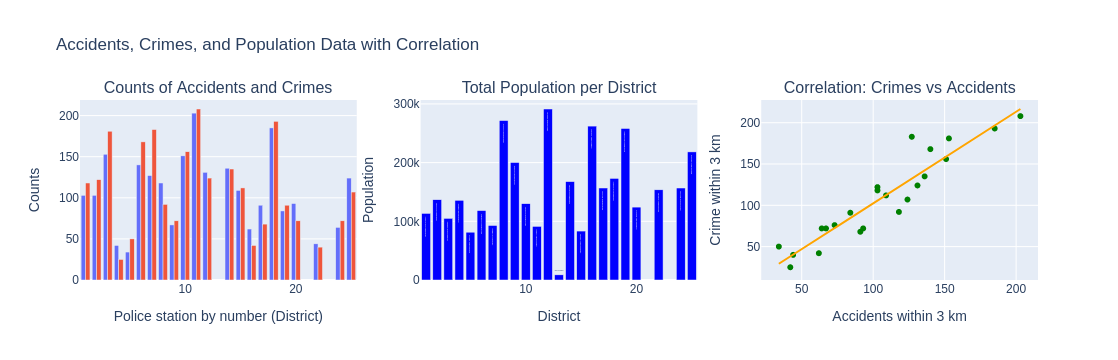

Pearson correlation coefficient between accidents and population: -0.10084050388312436
Pearson correlation coefficient between crimes and population: -0.26145692510899576
Pearson correlation coefficient between crimes and accidents: 0.9348296791110471


In [156]:
crime_counts_per_beat_grouped = crime_data.groupby(['District', 'Beat']).size().reset_index(name='count')
crime_counts_per_beat_grouped.sort_values('District', inplace=True)
crime_counts_with_population = pd.merge(crime_counts_per_beat_grouped, beat_data[['beat', 'population']], 
                                        left_on='Beat', right_on='beat', how='left')

total_population_per_district = crime_counts_with_population.groupby('District')['population'].sum().reset_index()

# Drop district 31
total_population_per_district = total_population_per_district[total_population_per_district['District'] != 31]

# Add counts to police_stations DataFrame
police_stations['Accidents within 3 km'] = accidents_near_stations
police_stations['Crime within 3 km'] = crimes_near_stations

# Create a figure with subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("Counts of Accidents and Crimes", "Total Population per District", "Correlation: Crimes vs Accidents"))

# Plotting the data for accidents and crimes near police stations
fig.add_trace(
    go.Bar(name='Accidents', x=police_stations['DISTRICT'], y=police_stations['Accidents within 3 km']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(name='Crimes', x=police_stations['DISTRICT'], y=police_stations['Crime within 3 km']),
    row=1, col=1
)

fig.update_xaxes(title_text='Police station by number (District)', row=1, col=1)
fig.update_yaxes(title_text='Counts', row=1, col=1)

fig.update_layout(barmode='group', showlegend=True)

# Plotting the data for total population per district
fig.add_trace(
    go.Bar(x=total_population_per_district['District'], y=total_population_per_district['population'],
           text=total_population_per_district['population'], textposition='auto', marker=dict(color='blue')),
    row=1, col=2
)

fig.update_xaxes(title_text='District', row=1, col=2)
fig.update_yaxes(title_text='Population', row=1, col=2)

fig.update_layout(showlegend=False)

# Scatter plot for Crimes vs Accidents with trendline
fig.add_trace(
    go.Scatter(x=police_stations['Accidents within 3 km'], y=police_stations['Crime within 3 km'], mode='markers',
               marker=dict(color='green'), name='Districts',
               text=police_stations['DISTRICT'], hoverinfo='text'),
    row=1, col=3
)

# Add trendline (linear fit)
slope, intercept = np.polyfit(police_stations['Accidents within 3 km'], police_stations['Crime within 3 km'], 1)
fig.add_trace(
    go.Scatter(x=police_stations['Accidents within 3 km'], y=slope * police_stations['Accidents within 3 km'] + intercept,
               mode='lines', line=dict(color='orange', width=2), name='Trendline'),
    row=1, col=3
)

fig.update_xaxes(title_text='Accidents within 3 km', row=1, col=3)
fig.update_yaxes(title_text='Crime within 3 km', row=1, col=3)

fig.update_layout(showlegend=False)

# Update overall layout
fig.update_layout(title_text="Accidents, Crimes, and Population Data with Correlation")

fig.show()

# Calculate Pearson correlation coefficients
correlation_accidents_population, _ = pearsonr(police_stations['Accidents within 3 km'], total_population_per_district['population'])
correlation_crimes_population, _ = pearsonr(police_stations['Crime within 3 km'], total_population_per_district['population'])
correlation_crimes_accidents, _ = pearsonr(police_stations['Crime within 3 km'], police_stations['Accidents within 3 km'])

# Output the correlation coefficients
print("Pearson correlation coefficient between accidents and population:", correlation_accidents_population)
print("Pearson correlation coefficient between crimes and population:", correlation_crimes_population)
print("Pearson correlation coefficient between crimes and accidents:", correlation_crimes_accidents)


## Population
As can be seen in the two figures above, supringly, the height of the crime count/ crash count bars are not proportional to the population for the distinct districts. For both the crashes with injury and the crime count, the correlations are displayed and they are relatively small (-0.101 and -0.261 respectively). by this information, there can be concluded that there is no big correlation/ causation between these factors. Although there is no correlation between population and the measured factors, there seem to be a very big correlation (r = 0.935) between crime and car accidents with inury. This means that they co-occur quite often, when considering an area within 3 km from a police station in Chicago. 

## Crime types
The next graph visualizes the kind of crimes commited

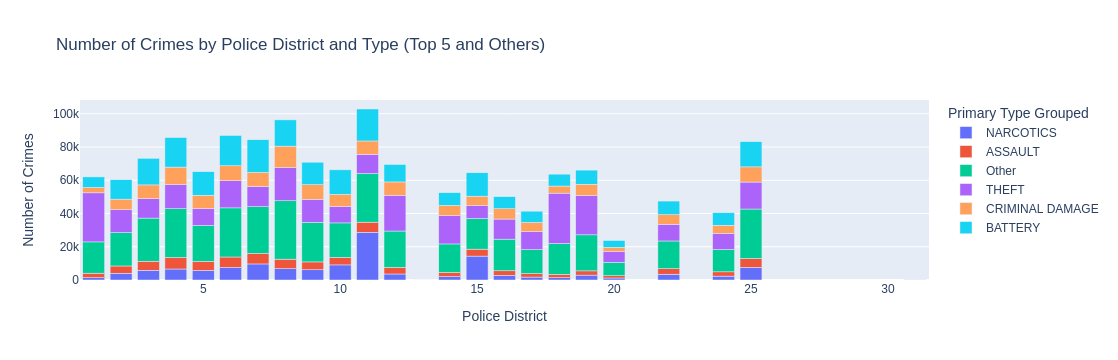

In [147]:

top_5_crime_types = crime_data['Primary Type'].value_counts().head(5).index

crime_data['Primary Type Grouped'] = crime_data['Primary Type'].where(crime_data['Primary Type'].isin(top_5_crime_types), 'Other')

crime_counts_per_district_grouped = crime_data.groupby(['District', 'Primary Type Grouped']).size().reset_index(name='count')

# Calculate total number of crimes per district
total_crimes_per_district = crime_counts_per_district_grouped.groupby('District')['count'].sum().reset_index(name='total_count')
# Drop district 31
total_population_per_district = total_population_per_district[total_population_per_district['District'] != 31]

# Sort districts by total number of crimes
sorted_districts = total_crimes_per_district.sort_values(by='total_count', ascending=False)['District'].tolist()

# Reorder crime_counts_per_district_grouped based on sorted districts
crime_counts_per_district_grouped['District'] = pd.Categorical(crime_counts_per_district_grouped['District'], categories=sorted_districts, ordered=True)
crime_counts_per_district_grouped = crime_counts_per_district_grouped.sort_values(by='District')

# Create a bar plot
fig = px.bar(crime_counts_per_district_grouped, x='District', y='count', color='Primary Type Grouped',
             labels={'District': 'Police District', 'count': 'Number of Crimes'},
             title='Number of Crimes by Police District and Type (Top 5 and Others)',
             category_orders={'District': sorted_districts})

fig.show()


In [ ]:
#################################################################################################################

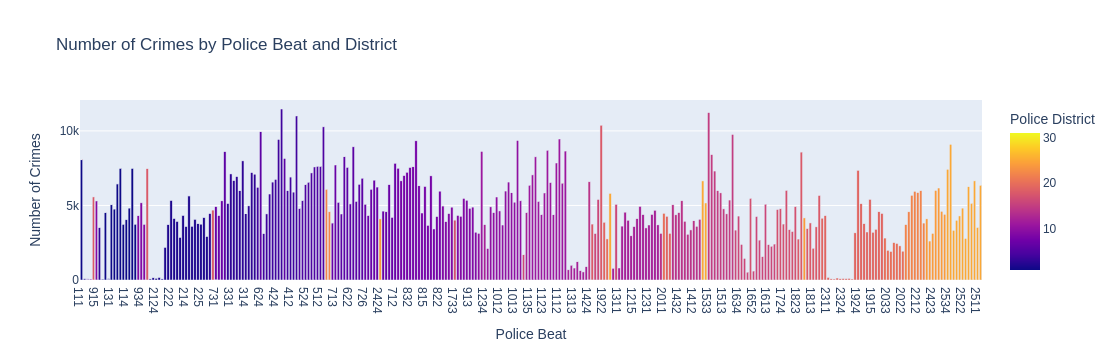

In [49]:
top_5_crime_types = crime_data['Primary Type'].value_counts().head(5).index

# Assign 'Other' to crime types not in the top 5
crime_data['Primary Type Grouped'] = crime_data['Primary Type'].where(crime_data['Primary Type'].isin(top_5_crime_types), 'Other')

# Count the number of crimes per beat and type
crime_counts_per_beat_grouped = crime_data.groupby(['District', 'Beat']).size().reset_index(name='count')

# Sort by District (alphabetically or numerically)
crime_counts_per_beat_grouped.sort_values('District', inplace=True)

# Create a bar plot
fig = px.bar(crime_counts_per_beat_grouped, x='Beat', y='count', color='District',
             labels={'Beat': 'Police Beat', 'count': 'Number of Crimes', 'District': 'Police District'},
             title='Number of Crimes by Police Beat and District',
             category_orders={'District': sorted(crime_counts_per_beat_grouped['District'].unique())})

fig.update_xaxes(type='category')  # Ensure Beat is treated as categorical

fig.show()

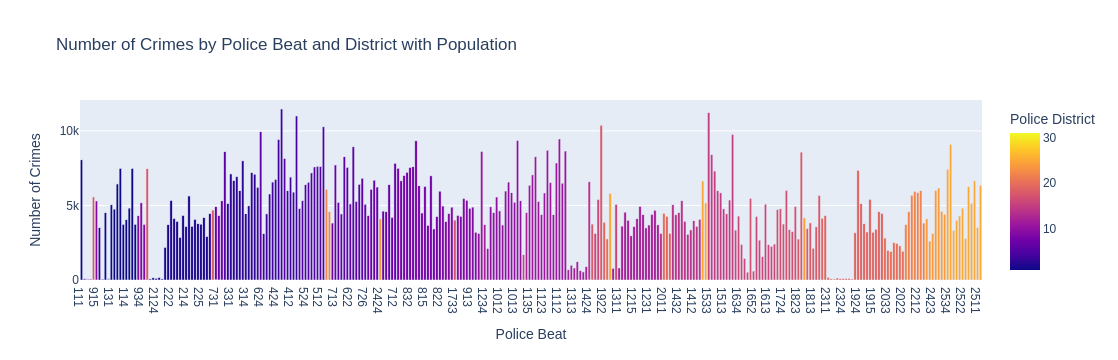

In [86]:
crime_counts_with_population = pd.merge(crime_counts_per_beat_grouped, beat_data[['beat', 'population']], 
                                        left_on='Beat', right_on='beat', how='left')

# Drop the redundant 'beat' column after merging
crime_counts_with_population.drop('beat', axis=1, inplace=True)

# Create a bar plot
fig = px.bar(crime_counts_with_population, x='Beat', y='count', color='District',
             hover_data={'Beat': False, 'District': True, 'count': True, 'population': True},
             labels={'Beat': 'Police Beat', 'count': 'Number of Crimes', 'District': 'Police District', 'population': 'Population'},
             title='Number of Crimes by Police Beat and District with Population',
             category_orders={'District': sorted(crime_counts_with_population['District'].unique())})

fig.update_xaxes(type='category')  # Ensure Beat is treated as categorical


fig.show()


The blue dots on the map of Chicago represent the places where a crime has occurred and the red dots are the places where a traffic accident occurred where someone got injured.

We wanted to visualize where all the crimes and traffic accidents with injuries happened since we suspect that those accidents are more often crime related. Therefore we wanted to plot the crimes on an interactive open street map if there is a correlation that is obvious for the eye.

From this visualization alone you can see that the dots on the map are most of the time clusters of dots and especially in the middle of the map you can see a horizontal line where almost no crime or traffic accidents happen. Since the dots are more clustered together, we can assume that there is some sort of correlation but what exactly is not expressively visible. 


NameError: name 'df_combined' is not defined

In [149]:
# Count occurrences of each beat in crash_data
crash_beat_counts = crash_data['BEAT_OF_OCCURRENCE'].value_counts().reset_index()
crash_beat_counts.columns = ['BEAT_OF_OCCURRENCE', 'Crash_Count']

# Count occurrences of each beat in crime_data
crime_beat_counts = crime_data['Beat'].value_counts().reset_index()
crime_beat_counts.columns = ['Beat', 'Crime_Count']

# Merge the counts on 'BEAT_OF_OCCURRENCE' or 'Beat'
merged_counts = pd.merge(crash_beat_counts, crime_beat_counts, left_on='BEAT_OF_OCCURRENCE', right_on='Beat', how='outer')

# Fill NaN values (if any) with 0, meaning there were no occurrences in either dataset
merged_counts.fillna(0, inplace=True)

# Sort the merged dataframe by 'Crash_Count' or any other criteria you need
merged_counts.sort_values(by='Crash_Count', ascending=False, inplace=True)

# Calculate correlation between 'Crash_Count' and 'Crime_Count'
correlation = merged_counts['Crash_Count'].corr(merged_counts['Crime_Count'])

# Display the sorted dataframe and correlation
print("Merged Counts:")
print(merged_counts)
print("\nCorrelation between Crash_Count and Crime_Count:", correlation)

Merged Counts:
     BEAT_OF_OCCURRENCE  Crash_Count    Beat  Crime_Count
227              1834.0       9709.0  1834.0      10727.0
3                 114.0       8150.0   114.0       4182.0
89                813.0       7972.0   813.0       7151.0
91                815.0       7568.0   815.0       6407.0
224              1831.0       7414.0  1831.0       8841.0
..                  ...          ...     ...          ...
274                 0.0          0.0  2323.0         84.0
160                 0.0          0.0  1312.0        786.0
275                 0.0          0.0  2324.0         99.0
278                 0.0          0.0  2333.0        105.0
162                 0.0          0.0  1322.0        625.0

[304 rows x 4 columns]

Correlation between Crash_Count and Crime_Count: 0.5319255167046516


## Literature
World Health Organization: WHO. (2023, 13 december). Road traffic injuries. https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries